In [2]:
import pandas as pd;
import numpy as np
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

FinalData = pd.read_csv('finalDate.csv')


In [3]:
FinalData


,Unnamed: 0,Price,Year,Mileage,City,State,Make,Model,Original Price,Vehicle Type,serviceTime,DepreciationRate,Gdp,Population
0,0,15893,2015,30608,HOUSTON,TX,NISSAN,ALTIMA2.5,31780,Sedan,3,0.500094,490074,"2,340,814"
1,1,13950,2015,95099,HOUSTON,TX,NISSAN,ALTIMA2.5,31780,Sedan,3,0.438955,490074,"2,340,814"
2,2,29900,2015,24384,HOUSTON,TX,CHEVROLET,SILVERADO,38200,Truck,3,0.782723,490074,"2,340,814"
3,3,26505,2014,42980,HOUSTON,TX,CHEVROLET,SILVERADO,38200,Truck,4,0.693848,490074,"2,340,814"
4,4,16400,2017,25446,HOUSTON,TX,NISSAN,ALTIMA2.5,31780,Sedan,1,0.516048,490074,"2,340,814"
5,5,18991,2014,33658,HOUSTON,TX,NISSAN,ALTIMA2.5,31780,Sedan,4,0.597577,490074,"2,340,814"
6,6,34000,2014,63120,HOUSTON,TX,GMC,SIERRA,35900,Truck,4,0.947075,490074,"2,340,814"
7,7,27988,2014,30321,HOUSTON,TX,GMC,SIERRA,35900,Truck,4,0.779610,490074,"2,340,814"
8,8,17986,2015,21448,HOUSTON,TX,HONDA,ACCORD,27470,Sedan,3,0.654751,490074,"2,340,814"
9,9,24977,2014,29344,HOUSTON,TX,CHEVROLET,SILVERADO,38200,Truck,4,0.653848,490074,"2,340,814"


In [4]:
FinalData.drop(FinalData.columns[0],axis=1,inplace=True)

In [5]:
#FinalData['Population'] = pd.to_numeric(FinalData['Population'], errors='coerce')
#FinalData['Population'] = FinalData['Population'].astype(int)

In [6]:
FinalData

,Price,Year,Mileage,City,State,Make,Model,Original Price,Vehicle Type,serviceTime,DepreciationRate,Gdp,Population
0,15893,2015,30608,HOUSTON,TX,NISSAN,ALTIMA2.5,31780,Sedan,3,0.500094,490074,"2,340,814"
1,13950,2015,95099,HOUSTON,TX,NISSAN,ALTIMA2.5,31780,Sedan,3,0.438955,490074,"2,340,814"
2,29900,2015,24384,HOUSTON,TX,CHEVROLET,SILVERADO,38200,Truck,3,0.782723,490074,"2,340,814"
3,26505,2014,42980,HOUSTON,TX,CHEVROLET,SILVERADO,38200,Truck,4,0.693848,490074,"2,340,814"
4,16400,2017,25446,HOUSTON,TX,NISSAN,ALTIMA2.5,31780,Sedan,1,0.516048,490074,"2,340,814"
5,18991,2014,33658,HOUSTON,TX,NISSAN,ALTIMA2.5,31780,Sedan,4,0.597577,490074,"2,340,814"
6,34000,2014,63120,HOUSTON,TX,GMC,SIERRA,35900,Truck,4,0.947075,490074,"2,340,814"
7,27988,2014,30321,HOUSTON,TX,GMC,SIERRA,35900,Truck,4,0.779610,490074,"2,340,814"
8,17986,2015,21448,HOUSTON,TX,HONDA,ACCORD,27470,Sedan,3,0.654751,490074,"2,340,814"
9,24977,2014,29344,HOUSTON,TX,CHEVROLET,SILVERADO,38200,Truck,4,0.653848,490074,"2,340,814"


In [7]:
FinalData['Population'] = FinalData['Population'].str.replace(',', '')

In [8]:
FinalData['Population'] = pd.to_numeric(FinalData['Population'], errors='coerce')
FinalData['Population'] = FinalData['Population'].astype(int)

In [9]:
FinalData

,Price,Year,Mileage,City,State,Make,Model,Original Price,Vehicle Type,serviceTime,DepreciationRate,Gdp,Population
0,15893,2015,30608,HOUSTON,TX,NISSAN,ALTIMA2.5,31780,Sedan,3,0.500094,490074,2340814
1,13950,2015,95099,HOUSTON,TX,NISSAN,ALTIMA2.5,31780,Sedan,3,0.438955,490074,2340814
2,29900,2015,24384,HOUSTON,TX,CHEVROLET,SILVERADO,38200,Truck,3,0.782723,490074,2340814
3,26505,2014,42980,HOUSTON,TX,CHEVROLET,SILVERADO,38200,Truck,4,0.693848,490074,2340814
4,16400,2017,25446,HOUSTON,TX,NISSAN,ALTIMA2.5,31780,Sedan,1,0.516048,490074,2340814
5,18991,2014,33658,HOUSTON,TX,NISSAN,ALTIMA2.5,31780,Sedan,4,0.597577,490074,2340814
6,34000,2014,63120,HOUSTON,TX,GMC,SIERRA,35900,Truck,4,0.947075,490074,2340814
7,27988,2014,30321,HOUSTON,TX,GMC,SIERRA,35900,Truck,4,0.779610,490074,2340814
8,17986,2015,21448,HOUSTON,TX,HONDA,ACCORD,27470,Sedan,3,0.654751,490074,2340814
9,24977,2014,29344,HOUSTON,TX,CHEVROLET,SILVERADO,38200,Truck,4,0.653848,490074,2340814


In [10]:
lm = sm.OLS(FinalData.DepreciationRate, sm.add_constant(FinalData.Mileage)).fit()

In [11]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       DepreciationRate   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     352.0
Date:                Sat, 17 Nov 2018   Prob (F-statistic):           1.65e-68
Time:                        20:39:04   Log-Likelihood:                 331.54
No. Observations:                1123   AIC:                            -659.1
Df Residuals:                    1121   BIC:                            -649.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7473      0.009     82.726      0.0

In [12]:
X = FinalData[['Mileage', 'Gdp']]
X = sm.add_constant(X)
Multi_lm2 = sm.OLS(FinalData.DepreciationRate, X).fit()

In [13]:
print(Multi_lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       DepreciationRate   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     180.3
Date:                Sat, 17 Nov 2018   Prob (F-statistic):           1.26e-68
Time:                        20:39:04   Log-Likelihood:                 334.97
No. Observations:                1123   AIC:                            -663.9
Df Residuals:                    1120   BIC:                            -648.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7139      0.016     45.708      0.0

In [14]:
X = FinalData[['Mileage','Gdp', 'serviceTime']]
X = sm.add_constant(X)
Multi_lm3 = sm.OLS(FinalData.DepreciationRate, X).fit()
print(Multi_lm3.summary())

                            OLS Regression Results                            
Dep. Variable:       DepreciationRate   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     171.7
Date:                Sat, 17 Nov 2018   Prob (F-statistic):           1.47e-91
Time:                        20:39:04   Log-Likelihood:                 390.83
No. Observations:                1123   AIC:                            -773.7
Df Residuals:                    1119   BIC:                            -753.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7453      0.015     49.202      

In [15]:
FinalData.describe()

,Price,Year,Mileage,Original Price,serviceTime,DepreciationRate,Gdp,Population
count,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1.123000e+03
mean,20525.684773,2013.430098,54086.666963,33472.310775,4.569902,0.611157,382170.152271,1.988258e+06
std,7931.377833,3.081667,40111.727925,5424.233620,3.081667,0.206555,157755.051340,3.917321e+05
min,2995.000000,2001.000000,51.000000,24500.000000,1.000000,0.116928,129298.000000,1.541456e+06
25%,14500.000000,2012.000000,27645.500000,29800.000000,3.000000,0.465658,129298.000000,1.541456e+06
50%,18995.000000,2014.000000,41668.000000,31780.000000,4.000000,0.596531,490074.000000,2.340814e+06
75%,26989.500000,2015.000000,72712.500000,38200.000000,6.000000,0.782697,490074.000000,2.340814e+06
max,43900.000000,2017.000000,298699.000000,45000.000000,17.000000,0.999874,490074.000000,2.340814e+06


In [16]:
FinalData.Make.value_counts()

CHEVROLET     326
NISSAN        180
JEEP          132
HONDA         113
VOLKSWAGEN     95
BMW            92
HYUNDAI        70
GMC            69
FORD           46
Name: Make, dtype: int64

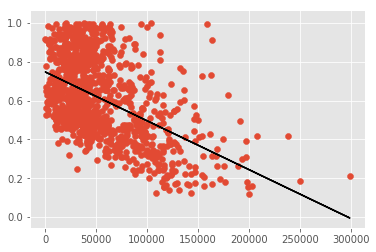

In [17]:
plt.scatter(FinalData.Mileage,FinalData.DepreciationRate)
plt.plot(FinalData.Mileage, lm.predict(), c = 'black')
plt.show()

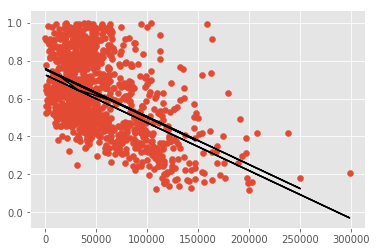

In [18]:
plt.scatter(FinalData.Mileage,FinalData.DepreciationRate)
plt.plot(FinalData.Mileage, Multi_lm2.predict(), c = 'black')
plt.show()

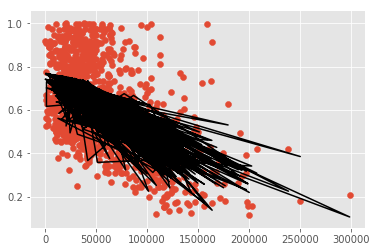

In [19]:
plt.scatter(FinalData.Mileage,FinalData.DepreciationRate)
plt.plot(FinalData.Mileage, Multi_lm3.predict(), c = 'black')
plt.show()

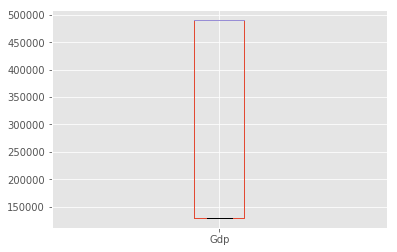

In [61]:
dataDummies = FinalData[['DepreciationRate','Mileage','Gdp', 'serviceTime','Population']].copy()
dataDummies = dataDummies.join(pd.get_dummies(FinalData[['Vehicle Type']]))
FinalData.describe()
FinalData[['Gdp']].boxplot()

In [53]:
dataForward = dataDummies.copy()
currentRegression = []
available = list(dataForward.columns)
available.remove('DepreciationRate')

bestAllTimeAic = np.inf
flag = True

while flag:
    currentBestAic = np.inf
    print "Current best AIC = " + str(bestAllTimeAic)
    print "Current regression: " + ', '.join(currentRegression)
    toAdd = None
    for each in available:
        regTemp = currentRegression[:]
        regTemp.extend([each])
        currentLm = sm.OLS(dataForward.DepreciationRate, sm.add_constant(dataForward[regTemp])).fit()
        currentAic = currentLm.aic
        print "\tChecking " + each + ": AIC = " + str(currentAic)
        if currentAic < currentBestAic:
            toAdd = each
            currentBestAic = currentAic
    if currentBestAic < bestAllTimeAic:
        print "\t\tAdding " + toAdd + " to model. New best AIC = " + str(currentBestAic) + '\n\n'
        currentRegression.append(toAdd)
        available.remove(toAdd)
        bestAllTimeAic = currentBestAic
    else:
        print "\t\tAdding no new variables to model. Ending forward selection."
        flag = False

Current best AIC = inf
Current regression: 
	Checking Mileage: AIC = -659.0784406811954
	Checking Gdp: AIC = -355.3362774640923
	Checking serviceTime: AIC = -747.9465158914031
	Checking Population: AIC = -352.7626613400962
	Checking Vehicle Type_SUV: AIC = -361.1165927926754
	Checking Vehicle Type_Sedan: AIC = -536.1781718142261
	Checking Vehicle Type_Truck: AIC = -479.68556166470125
		Adding serviceTime to model. New best AIC = -747.9465158914031


Current best AIC = -747.9465158914031
Current regression: serviceTime
	Checking Mileage: AIC = -764.5855195279546
	Checking Gdp: AIC = -757.3836566119221
	Checking Population: AIC = -752.9969219135569
	Checking Vehicle Type_SUV: AIC = -764.5864958035831
	Checking Vehicle Type_Sedan: AIC = -1258.1375704065076
	Checking Vehicle Type_Truck: AIC = -1088.5204224826894
		Adding Vehicle Type_Sedan to model. New best AIC = -1258.1375704065076


Current best AIC = -1258.1375704065076
Current regression: serviceTime, Vehicle Type_Sedan
	Checking Mile

In [39]:

plt.scatter(lmMultiple.predict(), dataDummies.sl, color = 'red', marker = 'o')
plt.plot(dataDummies.sl, dataDummies.sl, color = 'black')

Price                 int64
Year                  int64
Mileage               int64
City                 object
State                object
Make                 object
Model                object
Original Price        int64
Vehicle Type         object
serviceTime           int64
DepreciationRate    float64
Gdp                   int64
Population            int64
dtype: object

In [ ]:
plt.scatter(FinalData.Mileage,FinalData.DepreciationRate)
plt.plot(FinalData.Mileage, Multi_lm2.predict(), c = 'blue')
plt.title('Multiple Linear Regression Model for Mileage and GDP')
plt.xlabel('Mileage')
plt.ylabel('Depreciation Rate')
plt.show()

Text(0.5,0,'DepreciationRate')

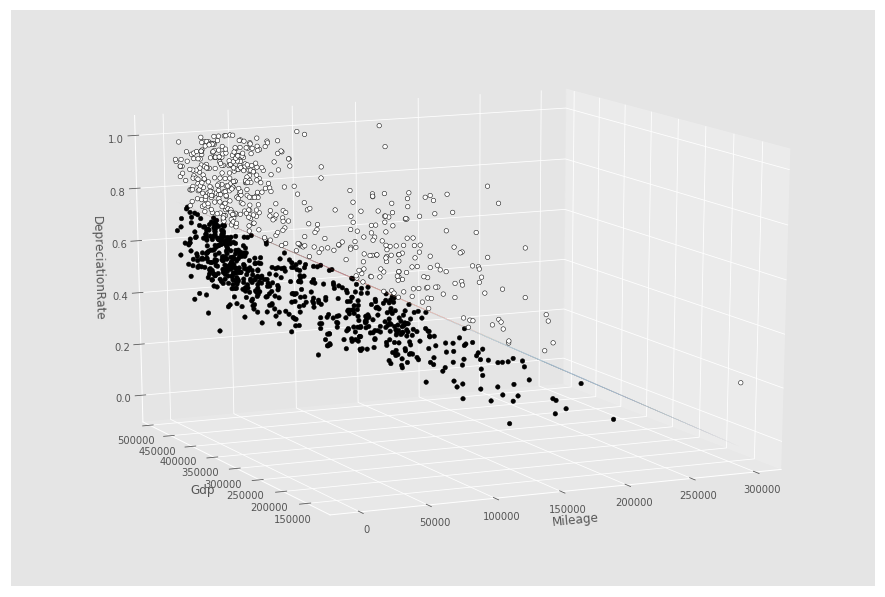

In [50]:
# TODO add image and put this code into an appendix at the bottom
from mpl_toolkits.mplot3d import Axes3D

X = dataDummies[['Mileage', 'Gdp']]
y = dataDummies['DepreciationRate']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.Mileage.min(), X.Mileage.max(), 100), 
                       np.linspace(X.Gdp.min(), X.Gdp.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].Mileage, X[resid >= 0].Gdp, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].Mileage, X[resid < 0].Gdp, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('Mileage')
ax.set_ylabel('Gdp')
ax.set_zlabel('DepreciationRate')